# 개봉 전 리뷰 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
  import pandas as pd

In [3]:
xb5i75 = pd.read_csv("/content/drive/MyDrive/텍데분/data/xb5i75.csv")
llpvjso = pd.read_csv("/content/drive/MyDrive/텍데분/data/11pvjso.csv")
l2zkbg0 = pd.read_csv("/content/drive/MyDrive/텍데분/data/12zkbg0.csv")
xdgviq = pd.read_csv("/content/drive/MyDrive/텍데분/data/xdgviq.csv")

In [5]:
df = pd.DataFrame(pd.concat([xb5i75.body,llpvjso.body, l2zkbg0.body, xdgviq.body], axis=0))

In [6]:
df = df.drop(0) #게시판 안내문 제거

In [7]:
df.drop_duplicates(subset=['body'],inplace=True) #중복제거

In [8]:
df = df.reset_index(drop=True)

## clean

In [9]:
#removed, deleted 제거 (레딧 댓글에서 검열되거나 삭제된 부분들)
df = df[df.body != ('[removed]')]
df = df[df.body != ('[deleted]')]

In [10]:
print('전처리 후 학습용 샘플의 개수:', len(df))

전처리 후 학습용 샘플의 개수: 5936


In [11]:
# df.to_csv("개봉전리뷰(5936개).csv",index=False, encoding='utf-8-sig')

In [12]:
#series로 변환
my_text = df.body.copy()

In [14]:
my_text[:2]

0    I will never not read this actress’s name as H...
2    Her voice seemed beautiful honestly. Just feel...
Name: body, dtype: object

In [15]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
#문장토큰화
result_stc = []
for token in my_text:
    sent_tokens = nltk.sent_tokenize(token)
    result_stc.append(sent_tokens)

In [17]:
#단어토큰화_이중리스트 살리기
result_wd = []

for sublist in result_stc:
    tokenized_sublist = []
    for sentence in sublist:
        word_tokens = nltk.word_tokenize(sentence)
        tokenized_sublist.extend(word_tokens)
    result_wd.append(tokenized_sublist)

In [18]:
#클린1
# 알파벳, 숫자, 공백, 밑줄('_')이 아닌 모든 문자 제거
import re
p = re.compile(r"[^\w\s]|_")

cleaned_lists1 = []

for sub_list in result_wd:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists1.append(cleaned_sub_list)

In [19]:
#클린2
#소문자+대문자인 경우 분리
import re
p = re.compile(r'(?<=[a-z])(?=[A-Z])')

cleaned_lists2 = []

for sub_list in cleaned_lists1:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists2.append(cleaned_sub_list)


In [20]:
#클린3
#대문자+대문자인 경우 분리
import re
p = re.compile(r'(?<=[A-Z])(?=[A-Z][a-z])')

cleaned_lists2_1 = []

for sub_list in cleaned_lists2:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists2_1.append(cleaned_sub_list)


In [21]:
#클린3
#알파벳과 공백이 아닌 문자, 숫자, 그리고 "http"로 시작하는 문자열 매칭하여 삭제
import re
p = re.compile(r"[^a-zA-Z\s]|\d+|http\S+")

cleaned_lists3 = []

for sub_list in cleaned_lists2_1:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub('', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists3.append(cleaned_sub_list)

In [22]:
#클린4
#공백리스트제거
filtered_list = [[item for item in sublist if item.strip()] for sublist in cleaned_lists3]

In [23]:
filtered_list[:2]

[['I',
  'will',
  'never',
  'not',
  'read',
  'this',
  'actress',
  's',
  'name',
  'as',
  'Halle',
  'Berry'],
 ['Her',
  'voice',
  'seemed',
  'beautiful',
  'honestly',
  'Just',
  'feel',
  'like',
  'little',
  'mermaid',
  'will',
  'not',
  'translate',
  'well',
  'in',
  'live',
  'action']]

In [24]:
#각 리스트 내의 원소들 중에 띄어쓰기가 있는 경우, 해당 원소를 2개의 원소로 분리
result_list = []

for sublist in filtered_list:
    temp_list = []
    for item in sublist:
        if ' ' in item:
            words = item.split()
            temp_list.extend(words)
        else:
            temp_list.append(item)
    result_list.append(temp_list)

In [25]:
#소문자변환
lowercase_lists = []

for sub_list in result_list:
    lowercase_sub_list = [word.lower() for word in sub_list]
    lowercase_lists.append(lowercase_sub_list)

In [26]:
#빈리스트 제거
filtered_lists = [sublist for sublist in lowercase_lists if sublist]

In [27]:
#stopword 제거
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

stopword_removed = []

for sub_list in filtered_lists:
    filtered_sub_list = [word for word in sub_list if word not in stopwords]
    stopword_removed.append(filtered_sub_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
#lemmatizing 'spacy' 이용


import spacy

nlp = spacy.load('en_core_web_sm')
lemmatized_lists = []

for sublist in stopword_removed:
    doc = nlp(" ".join(sublist))
    lemmatized_sublist = [token.lemma_ if token.pos_ == 'VERB' else token.text for token in doc]
    lemmatized_lists.append(lemmatized_sublist)


In [29]:
#빈리스트 제거
filtered_lists = [sublist for sublist in lemmatized_lists if sublist]

In [30]:
#길이수 2개이하, 추가단어들 제거

#해시태그, URL에 섞여있던 단어들, 붙어있던 단어들 제거
remove_words = ["boundingintocomics",
"lmfaoooooooooooooooo",
"grrrrrrrrrrrrrrrrrrr",
"returnyoutubedislike",
"returnyoutubedislike",
"disaaaappointeeeeeddd",
"returnyoutubedislikeapi",
"baaaaaaaaaaaaaaaaaaaaaad",
"gebbhagfogifgggkldgodflihgfeippi",
"boundingintocomics",
"bahahahahahahahha",
"bringbackmanatees",
"littlemermaidfans",
"missedopportunity",
"goodhousekeeping",
"samejokebutworse",
"rightrightright",
"nothowdrugswork",
"gylelenhuleugh",
"oooooooooohhhh",
"bwaaaaaaaaaaaa"]



result_list = []

for sublist in filtered_lists:
    temp_list = []
    for item in sublist:
        if len(item) > 2 and item not in remove_words:
            temp_list.append(item)
    result_list.append(temp_list)

In [31]:
#리스트 하나로 합치기
merged_list = [word for sublist in result_list for word in sublist]

In [32]:
merged_list[:3]

['never', 'read', 'actress']

## pos tagging

In [33]:
import spacy

nlp = spacy.load('en_core_web_sm')

tagged_list = []

for word in merged_list:
    doc = nlp(word)
    token = doc[0]
    tagged_list.append((token.text, token.pos_))


In [34]:
tagged_list[:5]

[('never', 'ADV'),
 ('read', 'VERB'),
 ('actress', 'NOUN'),
 ('name', 'NOUN'),
 ('halle', 'PROPN')]

In [35]:
wd_posjj = [item for item in tagged_list if item[1] == 'NOUN' or item[1] == 'PROPN' or item[1] == 'ADJ']

# 명사,형용사만 추출

In [36]:
jj = pd.DataFrame(wd_posjj)[0]

In [37]:
jjj = pd.DataFrame(jj)[pd.DataFrame(jj)[0] != 'fuck'][0]
#욕설제거

In [38]:
jjj[:5]

0      actress
1         name
2        halle
3        voice
4    beautiful
Name: 0, dtype: object

## wordcloud

In [39]:
from wordcloud import WordCloud

In [40]:
comments = ' '.join(jjj)

In [41]:
from PIL import Image
import numpy as np

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [48]:
from wordcloud import WordCloud
font_path = None
cloud = WordCloud(font_path=font_path)

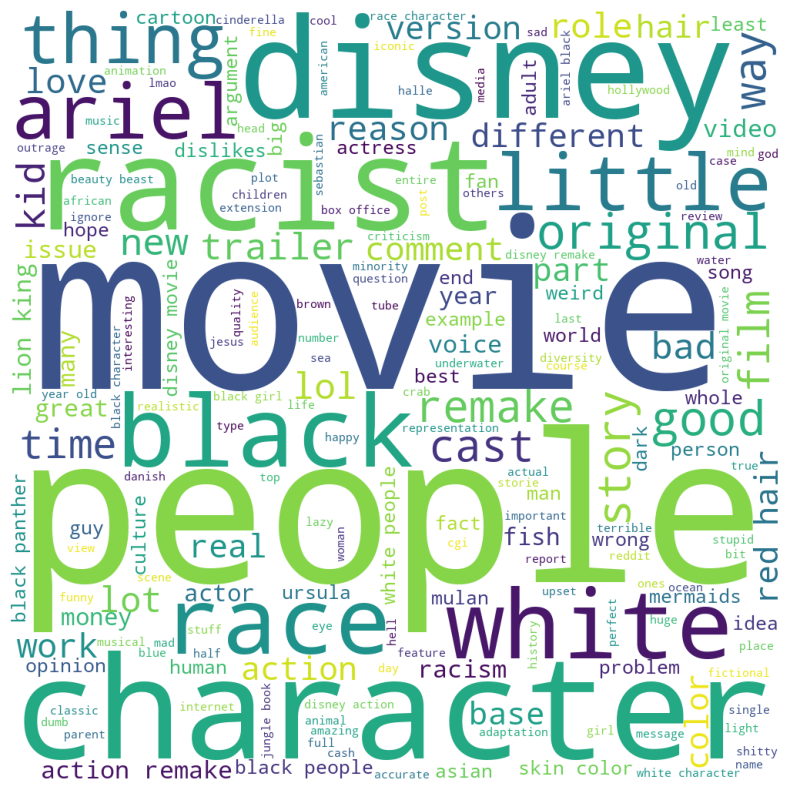

In [49]:
cloud = WordCloud(font_path = font_path,
                  background_color = 'white',
                  width=1000, height=1000)

my_cloud1 = cloud.generate_from_text(comments)

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr1)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# 인어공주영화리뷰

## summation

In [50]:
import pandas as pd

In [51]:
r1 = pd.read_csv("/content/drive/MyDrive/텍데분/data/인어공주rottentomato리뷰.csv")
r2 = pd.read_csv("/content/drive/MyDrive/텍데분/data/imdb리뷰.csv")

In [52]:
r1.head(3)

,Reviewer,Rating,Review Text
0,Doris Hecker,5,A definite must see Movie !!! Alot of differen...
1,JARPER,5,Less songs and more excitement. The new versio...
2,tara h,5,"It was soooo good, visual effects were amazin..."


In [53]:
r2.head(3)

,제목,평점,내용
0,WHY WHY WHY DISNEY? DO YOU KEEP MAKING LIVE AC...,6.0,You'd think a company like Disney with the amo...
1,It's hard to rate,6.0,I went to see this movie with the attitude tha...
2,A Shallow Dive That Missed its Mark,6.0,This live action remake was a disappointing at...


In [54]:
r2['Review Text'] = r2['제목'] + r2['내용']

In [55]:
r1 = r1[['Rating','Review Text']]
r2 = r2[['평점','Review Text']]

In [56]:
r2.columns = ['Rating','Review Text']

In [57]:
df = pd.DataFrame(pd.concat([r1, r2], axis=0))

In [58]:
df.drop_duplicates(['Review Text'],inplace=True)

In [59]:
my_text = df['Review Text']

In [60]:
#pd.DataFrame(my_text).to_csv("개봉후리뷰(5072개).csv", index=False, encoding='utf-8-sig')

## cleaning code

In [61]:
import nltk

In [62]:
#문장토큰화
result_stc = []
for token in my_text:
    sent_tokens = nltk.sent_tokenize(token)
    result_stc.append(sent_tokens)

In [63]:
#단어토큰화_이중리스트 살리기
result_wd = []

for sublist in result_stc:
    tokenized_sublist = []
    for sentence in sublist:
        word_tokens = nltk.word_tokenize(sentence)
        tokenized_sublist.extend(word_tokens)
    result_wd.append(tokenized_sublist)

In [64]:
#클린1
# 알파벳, 숫자, 공백, 밑줄('_')이 아닌 모든 문자 제거
import re
p = re.compile(r"[^\w\s]|_")

cleaned_lists1 = []

for sub_list in result_wd:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists1.append(cleaned_sub_list)

In [65]:
#클린2
#소문자+대문자인 경우 분리
import re
p = re.compile(r'(?<=[a-z])(?=[A-Z])')

cleaned_lists2 = []

for sub_list in cleaned_lists1:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists2.append(cleaned_sub_list)


In [66]:
#클린3
#대문자+대문자인 경우 분리

import re
p = re.compile(r'(?<=[A-Z])(?=[A-Z][a-z])')

cleaned_lists2_1 = []

for sub_list in cleaned_lists2:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists2_1.append(cleaned_sub_list)


In [67]:
#클린3
#알파벳과 공백이 아닌 문자, 숫자, 그리고 "http"로 시작하는 문자열 매칭하여 삭제
import re
p = re.compile(r"[^a-zA-Z\s]|\d+|http\S+")

cleaned_lists3 = []

for sub_list in cleaned_lists2_1:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub('', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists3.append(cleaned_sub_list)

In [68]:
#클린4
#공백리스트제거
filtered_list = [[item for item in sublist if item.strip()] for sublist in cleaned_lists3]

In [69]:
filtered_list[:1]

[['A',
  'definite',
  'must',
  'see',
  'Movie',
  'Alot',
  'of',
  'different',
  'emotions',
  'which',
  'had',
  'a',
  'Happy',
  'Ending']]

In [70]:
#각 리스트 내의 원소들 중에 띄어쓰기가 있는 경우, 해당 원소를 2개의 원소로 분리
result_list = []

for sublist in filtered_list:
    temp_list = []
    for item in sublist:
        if ' ' in item:
            words = item.split()
            temp_list.extend(words)
        else:
            temp_list.append(item)
    result_list.append(temp_list)

In [71]:
#소문자변환
lowercase_lists = []

for sub_list in result_list:
    lowercase_sub_list = [word.lower() for word in sub_list]
    lowercase_lists.append(lowercase_sub_list)

In [72]:
#빈리스트 제거
filtered_lists = [sublist for sublist in lowercase_lists if sublist]

In [73]:
#stopword 제거
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

stopword_removed = []

for sub_list in filtered_lists:
    filtered_sub_list = [word for word in sub_list if word not in stopwords]
    stopword_removed.append(filtered_sub_list)

In [74]:
#lemmatizing 'spacy' 이용 > WordNetLemmatizer가 ate, could등을 제대로 변환못함.
import spacy

nlp = spacy.load('en_core_web_sm')
lemmatized_lists = []

for sublist in stopword_removed:
    doc = nlp(" ".join(sublist))
    lemmatized_sublist = [token.lemma_ if token.pos_ == 'VERB' else token.text for token in doc]
    lemmatized_lists.append(lemmatized_sublist)


In [75]:
#빈리스트 제거
filtered_lists = [sublist for sublist in lemmatized_lists if sublist]

In [76]:
#길이수 2개이하, 추가단어들 제거

remove_words = ['amazingggggggggg', 'amazinnnnnnnng', 'peeeeeeeeeeeeerfect', 'seaaaaaaaaaaaaaaaaaaaaa', 'toooo']

result_list = []

for sublist in filtered_lists:
    temp_list = []
    for item in sublist:
        if len(item) > 2 and item not in remove_words:
            temp_list.append(item)
    result_list.append(temp_list)

In [77]:
#리스트 하나로 합칠때 쓸 코드
merged_list = [word for sublist in result_list for word in sublist]
df=pd.DataFrame(merged_list)
df['text_length'] = df[0].apply(len)
sorted_df = df.sort_values('text_length')

In [78]:
len(result_list)

5072

In [79]:
list(my_text[my_text.str.contains('remake')])[0:3]

['best live action remake by far',
 'Solid remake that properly honored the original.',
 'Great remake Halle first time on the big screen did not upset!!']

# 긍정/부정분석

In [80]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# SentimentIntensityAnalyzer 초기화
sid = SentimentIntensityAnalyzer()

# 리뷰별 감정 분석 결과 저장할 리스트
positive_reviews = []
negative_reviews = []

# 리뷰별로 감정 분석 수행
for review in result_list:
    review_text = ' '.join(review)  # 이중 리스트를 문자열로 변환
    sentiment_scores = sid.polarity_scores(review_text)

    # compound 점수를 기준으로 긍정/부정 판단
    if sentiment_scores['compound'] >= 0.05:
        positive_reviews.append(review_text)
    else:
        negative_reviews.append(review_text)

# 긍정 리뷰 데이터프레임 생성
df_positive = pd.DataFrame({'Review': positive_reviews})

# 부정 리뷰 데이터프레임 생성
df_negative = pd.DataFrame({'Review': negative_reviews})

# 결과 출력
print("긍정 리뷰 개수:", len(positive_reviews))
print("부정 리뷰 개수:", len(negative_reviews))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


긍정 리뷰 개수: 4730
부정 리뷰 개수: 342


In [81]:
#긍정/부정 리뷰 다시 이중리스트로

positive_reviews_list = []
negative_reviews_list = []

# positive_reviews를 이중 리스트로 변환
for review in positive_reviews:
    review_list = review.split()  # 공백을 기준으로 단어로 분리하여 리스트 생성
    positive_reviews_list.append(review_list)

# negative_reviews를 이중 리스트로 변환
for review in negative_reviews:
    review_list = review.split()  # 공백을 기준으로 단어로 분리하여 리스트 생성
    negative_reviews_list.append(review_list)

# LDA진행

In [82]:
from gensim import corpora
word_dict = corpora.Dictionary(positive_reviews_list)

In [83]:
corpus = [word_dict.doc2bow(text) for text in positive_reviews_list]

In [84]:
import gensim
N_TOPICS = 10 #몇개의 토픽을 지정할것인가.
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = N_TOPICS, id2word=word_dict, passes = 15)
# id2word=word_dict : 단어 인덱스 전달
# passes : 기본제공값사용(그렇게안중요)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

# 몇번째 토픽들이 어떠한 단어들로 주로 구성되어있는지 표시

(0, '0.041*"movie" + 0.030*"love" + 0.024*"original" + 0.024*"see"')
(1, '0.215*"love" + 0.077*"movie" + 0.041*"beautiful" + 0.030*"every"')
(2, '0.265*"find" + 0.261*"review" + 0.010*"seven" + 0.008*"idk"')
(3, '0.020*"see" + 0.019*"year" + 0.013*"old" + 0.011*"lead"')
(4, '0.045*"live" + 0.045*"disney" + 0.044*"action" + 0.030*"best"')
(5, '0.023*"film" + 0.021*"mermaid" + 0.018*"little" + 0.016*"world"')
(6, '0.019*"like" + 0.015*"ariel" + 0.014*"movie" + 0.013*"make"')
(7, '0.253*"helpful" + 0.133*"sign" + 0.126*"permalink" + 0.126*"vote"')
(8, '0.026*"movie" + 0.016*"beautiful" + 0.016*"watch" + 0.015*"would"')
(9, '0.097*"movie" + 0.081*"great" + 0.079*"amazing" + 0.056*"halle"')


In [87]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, word_dict)
pyLDAvis.display(vis)


In [88]:
from gensim import corpora
word_dict2 = corpora.Dictionary(negative_reviews_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
corpus2 = [word_dict2.doc2bow(text) for text in negative_reviews_list]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
import gensim
N_TOPICS = 10 #몇개의 토픽을 지정할것인가.
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics = N_TOPICS, id2word=word_dict2, passes = 15)
# id2word=word_dict : 단어 인덱스 전달
# passes : 기본제공값사용(그렇게안중요)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.041*"movie" + 0.030*"love" + 0.024*"original" + 0.024*"see"')
(1, '0.215*"love" + 0.077*"movie" + 0.041*"beautiful" + 0.030*"every"')
(2, '0.265*"find" + 0.261*"review" + 0.010*"seven" + 0.008*"idk"')
(3, '0.020*"see" + 0.019*"year" + 0.013*"old" + 0.011*"lead"')
(4, '0.045*"live" + 0.045*"disney" + 0.044*"action" + 0.030*"best"')
(5, '0.023*"film" + 0.021*"mermaid" + 0.018*"little" + 0.016*"world"')
(6, '0.019*"like" + 0.015*"ariel" + 0.014*"movie" + 0.013*"make"')
(7, '0.253*"helpful" + 0.133*"sign" + 0.126*"permalink" + 0.126*"vote"')
(8, '0.026*"movie" + 0.016*"beautiful" + 0.016*"watch" + 0.015*"would"')
(9, '0.097*"movie" + 0.081*"great" + 0.079*"amazing" + 0.056*"halle"')


In [91]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel2, corpus2, word_dict2)
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
